# Baselines

Notebook to run baselines and document results. Implementation of baselines can be found in baselines.py.

In [23]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

from baselines import *

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
minlens = [1,2,3,4,5]

In [8]:
hoc_num = 18
train_accs, test_accs = [], []
minlens = [1,2,3,4,5]
for minlen in minlens: 
    train_acc, test_acc = baseline_pathscore(hoc_num, minlen=minlen)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

Loading data...
Data loaded.
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 1
    Number of samples in dataset: 190703
    Test size: 0.1
    Train acc: 0.877534492402	 Test acc: 0.882072256305


Loading data...
Data loaded.
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 2
    Number of samples in dataset: 94960
    Test size: 0.1
    Train acc: 0.795598146588	 Test acc: 0.797809604044


Loading data...
Data loaded.
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 3
    Number of samples in dataset: 63662
    Test size: 0.1
    Train acc: 0.744113797015	 Test acc: 0.745405999686


Loading data...
Data loaded.
Baseline logistic regression on path scores:

    Only including trajectories with minimum length: 4
    Number of samples in dataset: 47639
    Test size: 0.1
    Train acc: 0.712839650146	 Test acc: 0.698782535684


Loading dat

In [17]:
minlens, train_accs, test_accs = np.array(minlens).reshape(-1,1), np.array(train_accs).reshape(-1,1), np.array(test_accs).reshape(-1,1)


(5, 2)


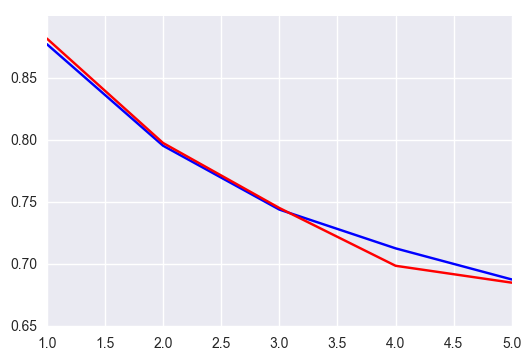

In [33]:
plt.plot(minlens, train_accs, 'b', minlens,test_accs, 'r')